In [1]:
from koma.signal import estimate_lags, shift_data
import numpy as np
import matplotlib.pyplot as plt

Lag identified to: 0.6350 s


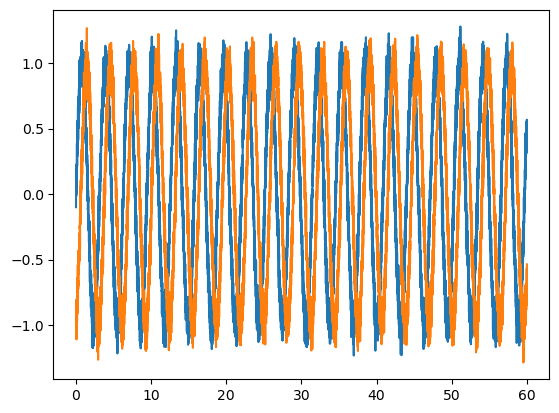

In [128]:
fs = 200.0
tmax = 60
t = np.arange(0, tmax, 1/fs)
w = 2.0
lag_org = 0.642 #seconds
noise_factor = 0.08

data = np.vstack([np.array(np.sin(w*t)), 
                  np.array(np.sin(w*(t-lag_org)))]).T
data = data + np.random.randn(*data.shape)*noise_factor
plt.plot(t, data)

# Identify lag
identified_lags = estimate_lags(data, fs=fs, upsample=10)
print(f'Lag identified to: {identified_lags[1]:.4f} s')

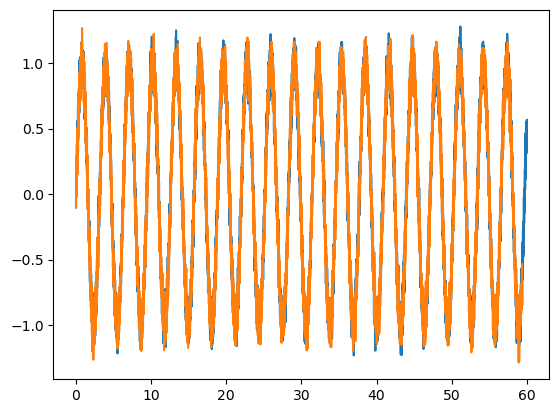

In [129]:
# Shift data based on identified lags data
identified_lags = estimate_lags(data, upsample=50, ref=0)
data_synced = shift_data(data, identified_lags, cut=False)
plt.plot(t, data_synced)